In [1]:
import sys
sys.path.append('E:/solar flares/data/2017-09-06')

# Optimal width plots

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import use_nessi as un
import use_nessi2 as un2
import os
from importlib import reload
from matplotlib import cm
import matplotlib.cbook as cbook
import matplotlib.colors as colors
from scipy.integrate import quad
from scipy.interpolate import interp1d

In [3]:
def load_opt_w_data(names_of_lines):

    data = {}
    for name in names_of_lines:  

        data[f"A_area_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"A_area_{name}", name)
        )
        data[f"A_wavl_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"A_wavl_{name}", name)
        )
        data[f"Deltas_{name}"] = np.load(
            un.get_file_path_opt_w_data(f"Deltas_{name}", name)
        )


    return data



lines = ["Ha17", "CaK17", "CaII17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}

reload(un)
data = load_opt_w_data(lines)
# disgard_cont_point("CaK17", data)
data.keys()

dict_keys(['A_area_Ha17', 'A_wavl_Ha17', 'Deltas_Ha17', 'A_area_CaK17', 'A_wavl_CaK17', 'Deltas_CaK17', 'A_area_CaII17', 'A_wavl_CaII17', 'Deltas_CaII17'])

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2224\976252686.py:14: RuntimeWarning: All-NaN slice encountered
  MAX = np.nanmax(A, axis=1)


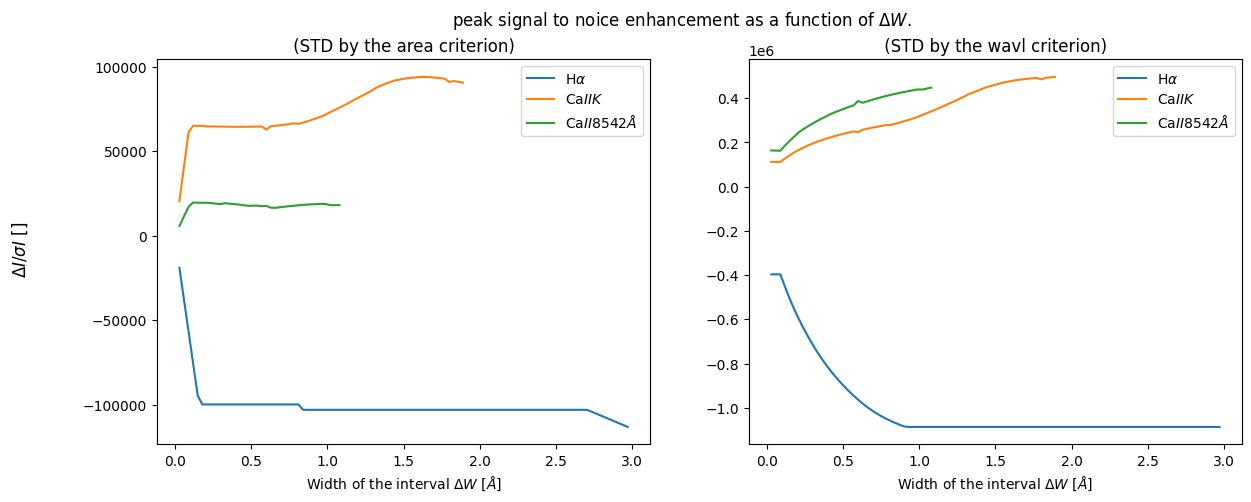

In [4]:
def plot_peak_enhancement(data, names_of_lines, long_names):
    fig, ax = plt.subplots(ncols=2, figsize=(14,5))
    fig.suptitle(r'peak signal to noice enhancement as a function of $\Delta W$.')
    fig.supylabel(r'$\Delta I/\sigma I$ []')
    ax_peak_enhancement(ax[0], data, names_of_lines, long_names, criterion='area')
    ax_peak_enhancement(ax[1], data, names_of_lines, long_names, criterion='wavl')
    plt.show()
    
    
def ax_peak_enhancement(ax, data, names_of_lines, long_names, criterion):
    for name in names_of_lines:
        A = data[f"A_area_{name}"] if criterion=="area" else data[f"A_wavl_{name}"]
        Deltas = data[f"Deltas_{name}"]
        MAX = np.nanmax(A, axis=1)
        ax.plot(Deltas, MAX, label=long_names[name])
        ax.set_title(f' (STD by the {criterion} criterion) ')
        ax.set_xlabel(r"Width of the interval $\Delta W$ $[\AA]$")

    ax.legend()

plot_peak_enhancement(data, lines, long_names)

In [5]:
# Full_line_ana(fig, ax, names_of_lines_list, scalefactor, name_of_flare='', name_of_show_line=None, data=None):
# if data is None:
#         data = get_data(names_of_lines_list)
#     for i, name in enumerate(names_of_lines_list):
#         wav, DFD , time, line, std = un2.contrast_FD_data(name,data, quiet_sun_subtraction=False, 
#                                                           area_factor=area_factor*scalefactor, normal=True, add_noise=False)
        
        
# def contrast_FOV_data(name_of_line, data, quiet_sun_subtraction=True, num=100, normal=True, scale_pix_to_saas=1/53.4):
#     return wav, DFOV*corr , time, line, std*corr


In [6]:

def stn_direct(weight_func, wav, DI, std):
    """_summary_

    Args:
        DI ((n_time, n_wav)-numpy array): difference intencity 
        std ((n_wav)-numpy array): the standard deviations for the standard deviations
        weight_func (function): A function returning the weight at any wavelength. 
        wav ((n_wav)-numpy array): the wavelength positions of the diff_spectr observations | (float)- the averaged std over the wavelengths. 

    Returns:
        (n_time)-arr: int (I(t,w)/std(w)) * g(w) array containing the weighted signal to noise ratio for the provided weights. 
    """
    weights = weight_func_to_weights(weight_func, wav)
    DS = DI / std
    return np.dot(DS, weights) # check if this is in the right order. 


def weight_func_to_weights(weight_func, wav):
    n = len(wav)
    def i_unit_weight(i):
        v = np.zeros(n)
        v[i] = 1
        f = lambda w : interp1d(wav,v)(w) * weight_func(w)
        return quad(f, wav[0], wav[-1])[0]
    return np.array([i_unit_weight(i) for i in range(n)])

# def weight_func_to_weights(weight_func, wav):
#     n = len(wav)
#     def i_unit_weight(i):
#         v = np.zeros(n)
#         v[i] = 1
#         f = lambda w : interp1d(wav,v)(w) * weight_func(w)
#         print(quad(f, wav[0], wav[-1])[0], f(wav[i]), weight_func(wav[i]))
#         return quad(f, wav[0], wav[-1])[0]
#     return np.array([i_unit_weight(i) for i in range(n)])
# possible weight functions 
def indicator_function(a,b):
    return lambda x : np.where(x > a, 1,0) * np.where( x < b ,  1, 0)

In [7]:
def get_data(lines):
    data = un.load_for_further_analysis(lines, un.get_full_path(lines[0]))
    for line in lines:
        if "CaK" in line:
            un2.disgard_cont_point(line, data)
    
    return data 


lines = ["Ha17", "CaK17", "CaII17"]
long_names = {"Ha17":r"H$\alpha$", "CaK17":r'Ca$IIK$', "CaII17":r'Ca$II 8542 \AA$'}

data = get_data(lines)


### loading data

[[6.56131879e+03 6.56181879e+03 6.56201879e+03 6.56221879e+03
  6.56251879e+03 6.56266879e+03 6.56281879e+03 6.56296879e+03
  6.56311879e+03 6.56341879e+03 6.56361879e+03 6.56381879e+03
  6.56431879e+03]
 [8.18242360e-01 7.69945519e-01 7.29005290e-01 6.10015586e-01
  2.63634766e-01 2.21668118e-01 2.11332035e-01 2.25095888e-01
  2.74499943e-01 5.75517177e-01 6.91757808e-01 7.55231210e-01
  7.94790538e-01]
 [2.35866216e-11 2.00257019e-11 1.53225653e-11 1.11489646e-11
  6.50288500e-12 6.28701731e-12 7.06594271e-12 8.03571525e-12
  1.01892475e-11 1.41000247e-11 1.93796519e-11 1.97392394e-11
  2.42270082e-11]]


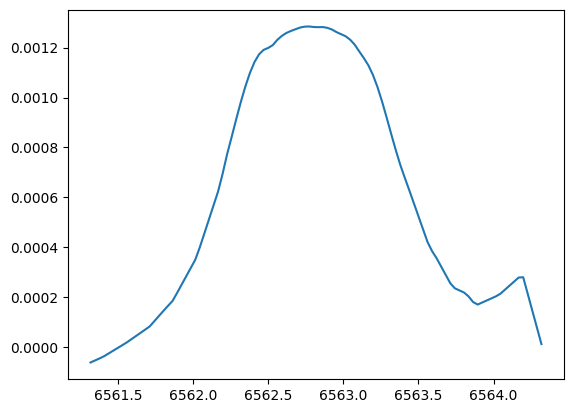

[2.41380733e-14 2.39172143e-14 2.36963554e-14 2.34754964e-14
 2.32546374e-14 2.30337785e-14 2.28129195e-14 2.25920605e-14
 2.23712016e-14 2.21503426e-14 2.19294836e-14 2.17086247e-14
 2.14877657e-14 2.12669067e-14 2.10460478e-14 2.08251888e-14
 2.06043298e-14 2.01292732e-14 1.94000163e-14 1.86707593e-14
 1.79415024e-14 1.72122454e-14 1.64829885e-14 1.57537315e-14
 1.50983721e-14 1.44512237e-14 1.38040753e-14 1.31569269e-14
 1.25097785e-14 1.18626301e-14 1.12655441e-14 1.07852710e-14
 1.03049978e-14 9.82472462e-15 9.34445144e-15 8.86417827e-15
 8.38390509e-15 7.90363192e-15 7.42335874e-15 6.94308556e-15
 6.63706980e-15 6.59244058e-15 6.54781135e-15 6.50318213e-15
 6.45855291e-15 6.50647376e-15 6.66751145e-15 6.82854915e-15
 6.98958685e-15 7.15062454e-15 7.33139043e-15 7.53188451e-15
 7.73237860e-15 7.93287268e-15 8.13336676e-15 8.46846488e-15
 8.91369348e-15 9.35892209e-15 9.80415069e-15 1.02493793e-14
 1.06700290e-14 1.10742927e-14 1.14785564e-14 1.18828201e-14
 1.22870838e-14 1.269134

array([2.63953825e+10, 2.58537265e+10, 2.79589799e+10, 3.08502524e+10,
       3.33698564e+10, 3.68751998e+10, 3.62473770e+10, 3.63139859e+10,
       3.80998048e+10, 3.80281683e+10, 3.78520836e+10, 3.76365114e+10,
       3.91776398e+10, 3.96789425e+10, 4.01874478e+10, 4.17125517e+10,
       4.43004330e+10, 4.58687702e+10, 4.61494212e+10, 4.87592503e+10,
       5.01549963e+10, 5.09941090e+10, 5.06369927e+10, 5.03665106e+10,
       5.02743589e+10, 5.00333038e+10, 5.02703560e+10, 4.96261399e+10,
       4.92714133e+10, 4.84422663e+10, 4.78766950e+10, 4.75373017e+10,
       4.74707701e+10, 4.69767470e+10, 4.71994915e+10, 4.64771513e+10,
       4.55133728e+10, 4.42028927e+10, 4.36831028e+10, 4.33519780e+10,
       4.27068657e+10, 4.17817859e+10, 4.03507732e+10, 3.98062817e+10,
       3.87793356e+10, 3.76542813e+10, 3.65155720e+10, 3.59180924e+10,
       3.52104086e+10, 3.49327393e+10, 3.42723254e+10, 3.36581184e+10,
       3.29405333e+10, 3.24293749e+10, 3.12950131e+10, 3.12160820e+10,
      

In [17]:
scalefactor = 2.4
name = "Ha17"

print(data[f"quiet_sun_{name}"])

wav, DFD , time, line, std = un2.difference_FD_data(name,data, quiet_sun_subtraction=False, 
                                                          area_factor=60**2/np.pi/959.63**2*scalefactor, add_noise=False)
plt.plot(wav, DFD[5])
plt.show()
weight_func = indicator_function(6561.3490928 , 6564.28848698)

print(std)
stn_direct(weight_func, wav, DFD, std)


### calculation signal to noise ratio in time for a given weight function

In [18]:
def weight_func_to_weights(weight_func, wav):
    n = len(wav)
    def i_unit_weight(i):
        v = np.zeros(n)
        v[i] = 1
        f = lambda w : interp1d(wav,v)(w) * weight_func(w)
        print(quad(f, wav[0], wav[-1])[0], f(wav[i]), weight_func(wav[i]))
        return quad(f, wav[0], wav[-1])[0]
    return np.array([i_unit_weight(i) for i in range(n)])


weights = weight_func_to_weights(weight_func, wav)
DS = DFD / std

stn = np.dot(DS, weights)

DS, weights, wav, np.shape(DS), np.shape(DFD), np.shape(std),  np.shape(time), np.shape(stn)


0.0 0.0 0
0.01515152165889625 1.0 1
0.03030303271654834 1.0 1
0.030303032693222952 1.0 1
0.03030303452196852 1.0 1
0.0 1.0 1
0.030303032973548825 1.0 1
0.03030303276455741 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303257859143 1.0 1
0.030303032805955567 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032219275026 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303281418716 1.0 1
0.03030303326937331 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032708681347 1.0 1
0.03030303273346383 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032907083735 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032764821988 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303271487832 1.0 1
0.030303032714878306 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.03030303276482198 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.030303032907083763 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0 1
0.0 1.0

(array([[-7.46612157e+09, -7.25141495e+09, -7.03270605e+09, ...,
         -1.19065924e+08, -2.79279316e+09, -5.40648688e+09],
        [-7.39087783e+09, -7.17775725e+09, -6.96066394e+09, ...,
          7.61636863e+08, -1.89956938e+09, -4.50102325e+09],
        [-6.51041447e+09, -6.26243447e+09, -6.00983194e+09, ...,
          1.51050628e+09, -1.17385266e+09, -3.79793938e+09],
        ...,
        [-2.27014552e+10, -2.27139345e+10, -2.27266464e+10, ...,
         -1.77653279e+10, -2.01381762e+10, -2.24577467e+10],
        [-2.26650608e+10, -2.26825504e+10, -2.27003661e+10, ...,
         -1.75908461e+10, -1.99574919e+10, -2.22709992e+10],
        [-2.28299990e+10, -2.28316637e+10, -2.28333593e+10, ...,
         -1.75624882e+10, -1.99165604e+10, -2.22177763e+10]]),
 array([0.        , 0.01515152, 0.03030303, 0.03030303, 0.03030303,
        0.        , 0.03030303, 0.03030303, 0.        , 0.        ,
        0.03030303, 0.03030303, 0.        , 0.        , 0.        ,
        0.03030303, 0.   

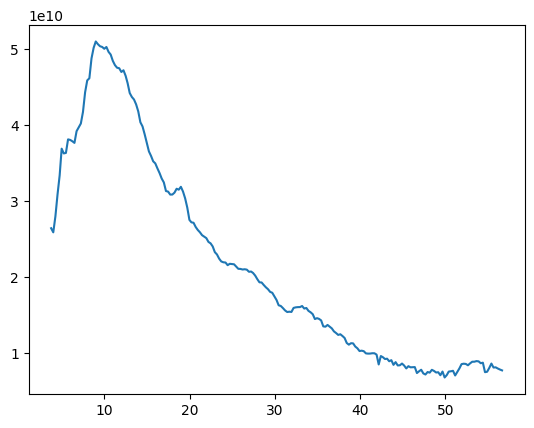

In [19]:
plt.plot(time, stn)

### Lower threshold for detection cutt off

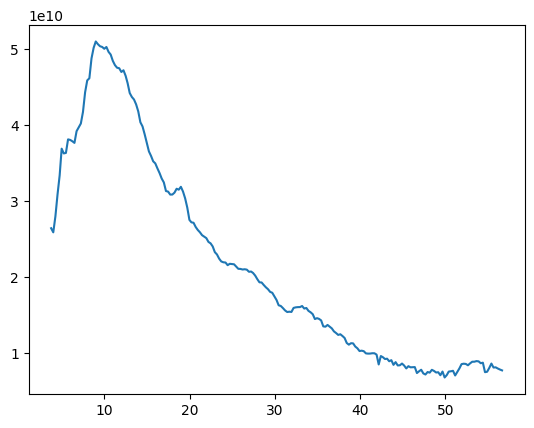

In [20]:
def lower_threshold_cutoff(t, a):
    """cut off array under thershold

    Args:
        t (fl): lower threshold
        a (arr): input array
    """
    return np.where(a > t, a, 0)

t = 1e7 # for example

stnl = lower_threshold_cutoff(t, stn)
plt.plot(time, stnl)

### different meassures:
#### given a specific timelength C



In [21]:
timestep  = (time[-1] - time[0]) / (len(time) - 1)
timestep

0.24944968553459115

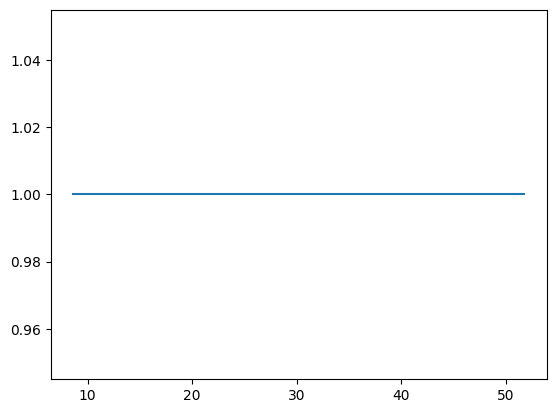

In [22]:
C = 10 #example
N = round(C / timestep)

# measure 0:
stn0 = np.where(stnl >0, 1, 0)
stn0 = np.convolve(stn0, np.ones(N)/N, mode='valid')
time0 = np.convolve(time, np.ones(N)/N, mode='valid')

plt.plot(time0, stn0)

In [23]:
def max_rolling(A,K):
    return np.array([max(A[j:j+K]) for j in range(len(A)-K)])

alpha = 0
alpha = 0.1
alpha = 1
alpha = 3
alpha = 10
alpha = 20
alpha = 1000
alpha = inf


C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2224\3364468716.py:14: RuntimeWarning: overflow encountered in power
  stn_alpha = stn ** alpha


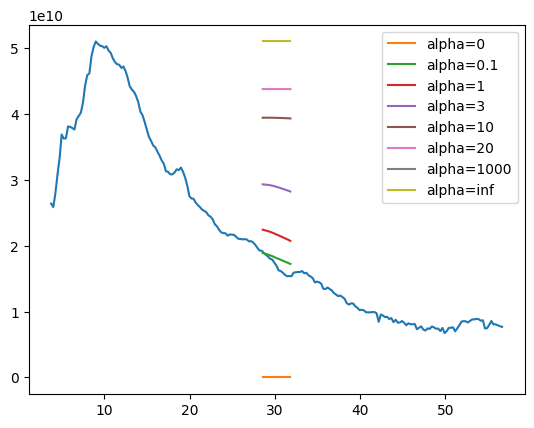

In [28]:
# finite measure
def measure(alpha, stn, time, C=10):
    timestep  = (time[-1] - time[0]) / (len(time) - 1)
    N = round(C / timestep)

    if alpha == 0:
        stn_alpha = np.where(stn >0, 1, 0)
        stn_alpha = np.convolve(stn_alpha, np.ones(N)/N, mode='valid')
        
    elif alpha == np.inf:
        stn_alpha = max_rolling(stn, N-1)
        
    else:
        stn_alpha = stn ** alpha
        stn_alpha = np.convolve(stn_alpha, np.ones(N)/N, mode='valid') ** (1 / alpha)
    
    time_alpha = np.convolve(time, np.ones(N)/N, mode='valid')

    plt.plot(time_alpha, stn_alpha, label = f'alpha={alpha}')
    return np.max(stn_alpha)

plt.plot(time, stnl)
for i in [0,0.1,1,3,10,20,1000,np.inf]:
    print(f"alpha = {i}")
    measure(i, stn, time, C= 50)

plt.legend()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_2224\730211503.py:14: RuntimeWarning: overflow encountered in power
  stn_alpha = stn ** alpha


inf

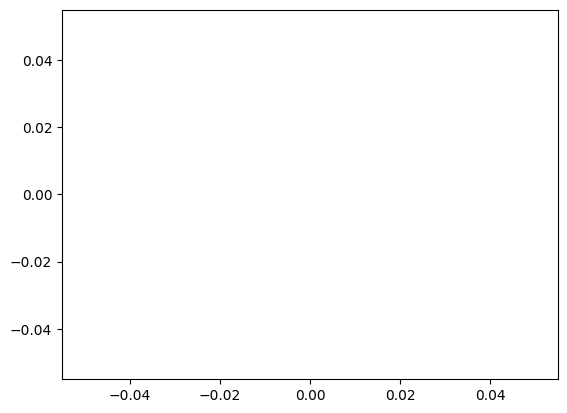

In [26]:
measure(100, stnl, time)
